## 42577 Introduction to Business Analytics

# **Project: Mobility with Citi Bike**

*A project for course 42577 Introduction to Business Analytics, by:*

* Lilja Schopka (s232027)
* Berghildur Bernódusdóttir (s232030)
* Zhila Amini (s220069)
* Ioana Popescu (s222692)

*Word count: 940*

### To Do: 

- Write introduction
- Finish the 3.2 regression part -> plot the r-squared scores by the clusters
- Finish 3.3 (Calculating the number of bikes)
- Exploratory component
- Write conclusion
- clean everything up
- ask in class how we should reference borrowed code

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#42577-Introduction-to-Business-Analytics" data-toc-modified-id="42577-Introduction-to-Business-Analytics-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>42577 Introduction to Business Analytics</a></span></li></ul></li><li><span><a href="#Project:-Mobility-with-Citi-Bike" data-toc-modified-id="Project:-Mobility-with-Citi-Bike-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Project: Mobility with Citi Bike</strong></a></span></li><li><span><a href="#Necessary-Liabraries-and-Tools" data-toc-modified-id="Necessary-Liabraries-and-Tools-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Necessary Liabraries and Tools</a></span></li><li><span><a href="#Data-Loader" data-toc-modified-id="Data-Loader-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Loader</a></span><ul class="toc-item"><li><span><a href="#data-description" data-toc-modified-id="data-description-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>data description</a></span></li><li><span><a href="#Data-prep" data-toc-modified-id="Data-prep-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data prep</a></span></li></ul></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data visualization</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Gender" data-toc-modified-id="Gender-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#User-type" data-toc-modified-id="User-type-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>User type</a></span></li><li><span><a href="#bike-id" data-toc-modified-id="bike-id-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>bike id</a></span></li><li><span><a href="#birth_year" data-toc-modified-id="birth_year-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>birth_year</a></span></li><li><span><a href="#pickups" data-toc-modified-id="pickups-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>pickups</a></span></li><li><span><a href="#Dropoffs" data-toc-modified-id="Dropoffs-4.0.6"><span class="toc-item-num">4.0.6&nbsp;&nbsp;</span>Dropoffs</a></span></li></ul></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#pickups-and-dropoffs-pivot-tables" data-toc-modified-id="pickups-and-dropoffs-pivot-tables-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>pickups and dropoffs pivot tables</a></span></li><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>K-Means Clustering</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Predict" data-toc-modified-id="Predict-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Predict</a></span></li></ul></li></ul></li><li><span><a href="#Prediction-Challenge" data-toc-modified-id="Prediction-Challenge-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Prediction Challenge</a></span></li><li><span><a href="#Exploratory-Component" data-toc-modified-id="Exploratory-Component-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exploratory Component</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# 1. Introduction

WRITE OVERALL ABOUT THE PROJECT BACKROUND, MOTIVATIONS AND DESCRIPTION

# 2. Data analysis and Visualization

### Necessary Liabraries and Tools

In [2]:
from DataLoader import DataLoader


%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

'''import more stuff here'''

#matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 4)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 4)

### Data Loading

In [3]:
# Ila
import os

current_directory = os.path.dirname(os.path.abspath('main.ipynb'))
parent_directory = os.path.dirname(current_directory)

file_path = os.path.join(parent_directory, "Trips_2018.csv")

Read the dataset from the CSV file

In [5]:
#file_path = 'Trips_subset.csv'

# read the existing subset of the data
df = DataLoader.read_data(file_path)
# Display few variables
df.head(8).T 

,0,1,2,3,4,5,6,7
Unnamed: 0,0,1,2,3,4,5,6,7
tripduration,970,723,496,306,306,1602,722,434
starttime,2018-01-01 13:50:57.4340,2018-01-01 15:33:30.1820,2018-01-01 15:39:18.3370,2018-01-01 15:40:13.3720,2018-01-01 18:14:51.5680,2018-01-01 21:31:54.1920,2018-01-02 07:54:53.6460,2018-01-02 08:06:14.3310
stoptime,2018-01-01 14:07:08.1860,2018-01-01 15:45:33.3410,2018-01-01 15:47:35.1720,2018-01-01 15:45:20.1910,2018-01-01 18:19:57.6420,2018-01-01 21:58:36.3530,2018-01-02 08:06:55.8720,2018-01-02 08:13:28.7670
start_station_id,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
start_station_latitude,40.767272,40.767272,40.767272,40.767272,40.767272,40.767272,40.767272,40.767272
start_station_longitude,-73.993929,-73.993929,-73.993929,-73.993929,-73.993929,-73.993929,-73.993929,-73.993929
end_station_id,505.0,3255.0,525.0,447.0,3356.0,482.0,228.0,173.0
end_station_latitude,40.749013,40.750585,40.755942,40.763707,40.774667,40.739355,40.754601,40.760683
end_station_longitude,-73.988484,-73.994685,-74.002116,-73.985162,-73.984706,-73.999318,-73.971879,-73.984527


## 2.1 Data insights and Visualization 

Let's gain insights into the structure and characteristics of the data:

In [5]:
print(f"The number of the rows = {len(df)} \n")
print("Dataframe information")
df.info()

The number of the rows = 17548339 

Dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


Let's observe wether null values are present in the Data frame


In [6]:
df.isnull().any()

Unnamed: 0                 False
tripduration               False
starttime                  False
stoptime                   False
start_station_id            True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_latitude       False
end_station_longitude      False
bikeid                     False
usertype                   False
birth_year                 False
gender                     False
dtype: bool

True indicates a null value and False indicates there is no null value. We can observe that there are 2 columns containing null values. `start_station_id` and `end_station_id` columns are missing data points, so we will replace them using mode and mean:

In [6]:
# Replace missing values
df["start_station_id"].fillna(df["start_station_id"].mode()[0], inplace = True)
df["end_station_id"].fillna(df["end_station_id"].mode()[0], inplace = True)

Let's check if it worked as anticipated:

In [9]:
df.isnull().any()

Unnamed: 0                 False
tripduration               False
starttime                  False
stoptime                   False
start_station_id           False
start_station_latitude     False
start_station_longitude    False
end_station_id             False
end_station_latitude       False
end_station_longitude      False
bikeid                     False
usertype                   False
birth_year                 False
gender                     False
dtype: bool

In [10]:
print("Data summary statistics = \n")
df.describe()

Data summary statistics = 



,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,8.774169e+06,9.887432e+02,1.589130e+03,4.073737e+01,-7.398260e+01,1.580679e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,5.065769e+06,1.889584e+04,1.439386e+03,3.225813e-02,1.912753e-02,1.438456e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,0.000000e+00,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.387084e+06,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,8.774169e+06,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.316125e+07,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.754834e+07,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


In [11]:
print("Data correlation = \n")
df.corr()

Data correlation = 



ValueError: could not convert string to float: '2018-01-01 13:50:57.4340'

### Gender distribution

Let's look at the distribution of the genders next:

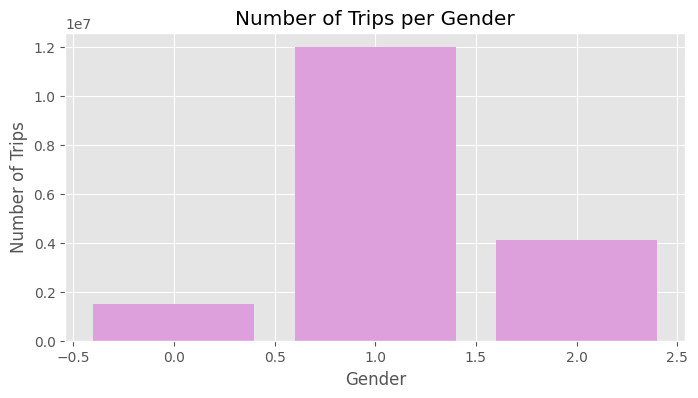

available values (classes) for the gender column = [1 0 2]
 the length data where gender=0: 1484555
 the length data where gender=1: 11971322
 the length data where gender=2: 4092462


In [22]:
""" Gender """

# Group by 'gender' and count the number of trips per gender
trips_per_gender = df.groupby('gender').size().reset_index(name='trips_per_gender')

# Plot the number of trips per gender
plt.figure(figsize=(8, 4))
plt.bar(trips_per_gender['gender'], trips_per_gender['trips_per_gender'], color='plum')
plt.title('Number of Trips per Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.show()

print(f"available values (classes) for the gender column = {df['gender'].unique()}")
print(f" the length data where gender=0: {len(df[df['gender']==0])}")
print(f" the length data where gender=1: {len(df[df['gender']==1])}")
print(f" the length data where gender=2: {len(df[df['gender']==2])}")

We can see that we have three categories; 1, 2, and 0. 1 represents men, 2 represents women and 0 are users that did not declare their gender. From the histogram we can see that most users are men. 

### User types

Next we will look at the distribution of the user types:

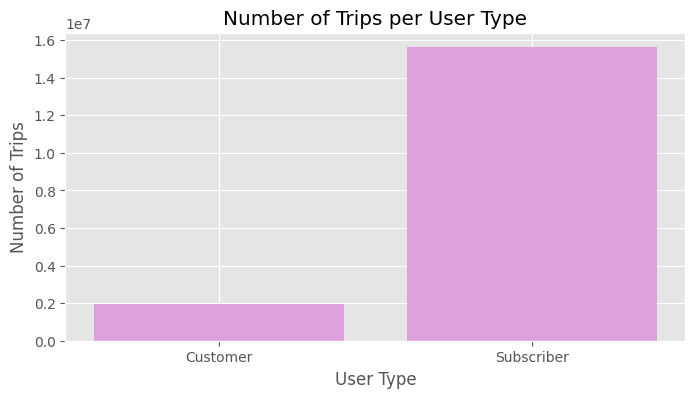

available values (classes) for the gender column = ['Subscriber' 'Customer']
 the length data where usertype=Subscriber: 15614825
 the length data where usertype=Customer: 1933514


In [21]:
""" Usertypes """

# Group by 'user_type' and count the number of trips per user type
trips_per_user_type = df.groupby('usertype').size().reset_index(name='trips_per_user_type')

# Plot the number of trips per user type
plt.figure(figsize=(8, 4))
plt.bar(trips_per_user_type['usertype'], trips_per_user_type['trips_per_user_type'], color='plum')
plt.title('Number of Trips per User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.show()


print(f"available values (classes) for the gender column = {df['usertype'].unique()}")
print(f" the length data where usertype=Subscriber: {len(df[df['usertype']=='Subscriber'])}")
print(f" the length data where usertype=Customer: {len(df[df['usertype']=='Customer'])}")

We can see that there are more subscribers than customers that use the bikes. 

### Bike analysis

Finally let's look at the number of available bikes and average trip duration:


Bike statistics:
Number of bikes used: 15244
Range of trip counts per bike: [1, 2862]
Mean: 1151.16
STD: 555.23



<Figure size 1200x400 with 0 Axes>

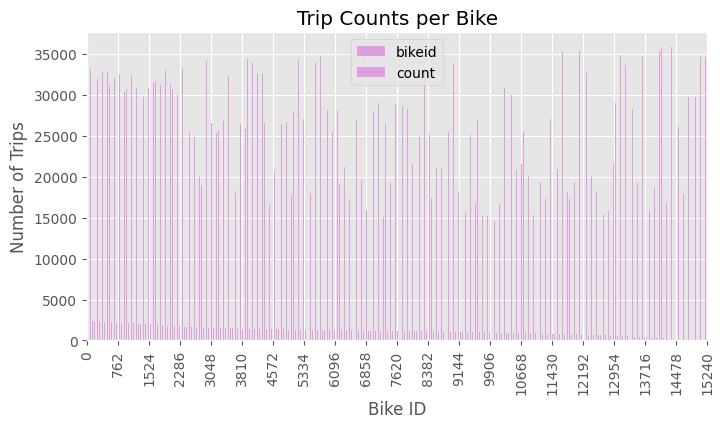

In [24]:
# Computing statistics for the bikes
bike_data = df['bikeid'].value_counts().reset_index()

print(f"""
Bike statistics:
Number of bikes used: {len(bike_data)}
Range of trip counts per bike: [{min(bike_data['count'])}, {max(bike_data['count'])}]
Mean: {bike_data['count'].mean():.2f}
STD: {bike_data['count'].std():.2f}
""")

# Top 10 most used bikes and their counts
bike_data[:10].T

# Plotting the number of trips started and ended per station
plt.figure(figsize=(12, 4))

bike_data.plot(kind='bar', position=0, width=0.4, align='center', color='plum', legend=True)

plt.title('Trip Counts per Bike')
plt.xlabel('Bike ID')
plt.ylabel('Number of Trips')

tick_positions = range(0, len(bike_data), max(1, len(bike_data) // 20))
plt.xticks(tick_positions, [bike_data.index[i] if i < len(bike_data) else '' for i in tick_positions], rotation=90)

plt.show()

### Birth year of users

Now let's look at the distribution of birth years of users:

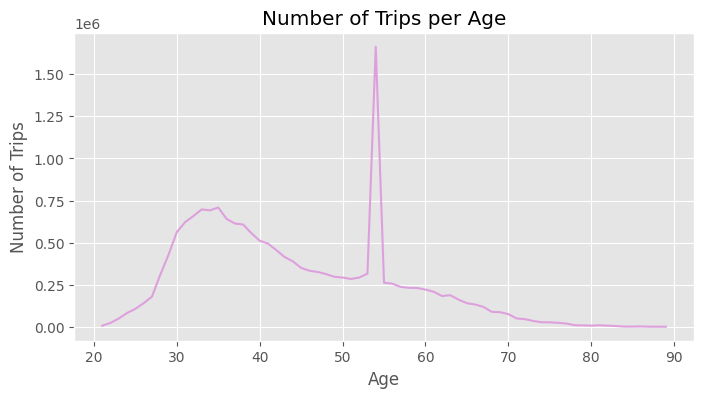

In [25]:
# Calculate age based on birth year
current_year = datetime.now().year
df['age'] = current_year - df['birth_year']

# Filter individuals younger than 90
filtered_df = df[df['age'] < 90]

# Group by 'age' and count the number of trips per age
trips_per_age = filtered_df.groupby('age').size().reset_index(name='trips_per_age')

# Plot the number of trips per age
plt.figure(figsize=(8, 4))
plt.plot(trips_per_age['age'], trips_per_age['trips_per_age'], color='plum')
plt.title('Number of Trips per Age')
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.show()

This graph shows that there are a lot of users that are aged 54. This is very peculiar. If we ignore that, we can that most users are between the ages 25 and 40. (Should we make a table of generations and number of people?)

### Pickups

In [27]:
# Extract pickup stations
pickup_stations = df.groupby(['start_station_id', pd.Grouper(freq='D')]).size().reset_index(name='pickup_counts')

# Find the busiest pickup station for each day
busiest_pickup_stations = pickup_stations.loc[pickup_stations.groupby('starttime')['pickup_counts'].idxmax()]

# Plot the busiest pickup stations over time
plt.figure(figsize=(8, 4))
for station_id in busiest_pickup_stations['start_station_id'].unique():
    station_data = busiest_pickup_stations[busiest_pickup_stations['start_station_id'] == station_id]
    plt.plot(station_data['starttime'], station_data['pickup_counts'], label=f'Station {station_id}')

plt.title('Busiest Pickup Stations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.legend()
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

### Dropoffs

In [28]:
# Extract dropoff stations
dropoff_stations = df.groupby(['end_station_id', pd.Grouper(key='stoptime', freq='D')]).size().reset_index(name='dropoff_counts')

# Find the busiest dropoff station for each day
busiest_dropoff_stations = dropoff_stations.loc[dropoff_stations.groupby('stoptime')['dropoff_counts'].idxmax()]

# Plot the busiest dropoff stations over time
plt.figure(figsize=(8, 4))
for station_id in busiest_dropoff_stations['end_station_id'].unique():
    station_data = busiest_dropoff_stations[busiest_dropoff_stations['end_station_id'] == station_id]
    plt.plot(station_data['stoptime'], station_data['dropoff_counts'], label=f'Station {station_id}')

plt.title('Busiest Dropoff Stations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Dropoffs')
plt.legend()
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

### Correlation Visualization with heatmap

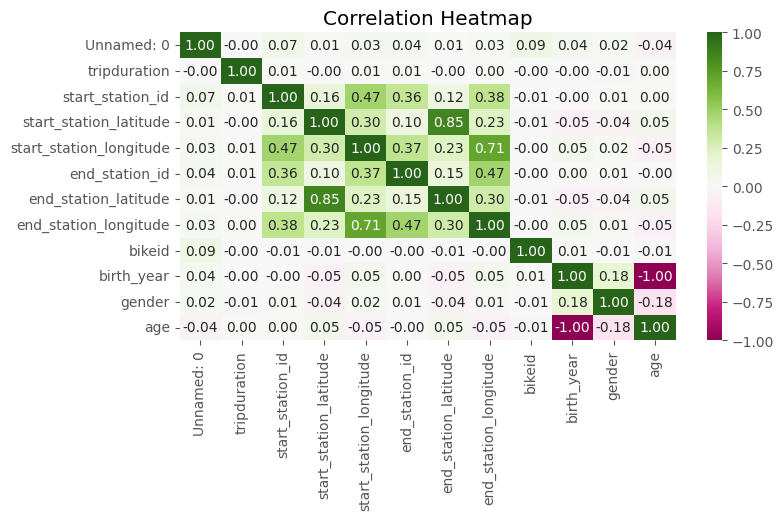

<Figure size 7000x4500 with 0 Axes>

In [31]:
# before computing the correlation matrix is important to ensure that the variable scales are the same!
# re-scalling


# feature selection (get only numerical columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Heatmap')
plt.figure(figsize=(70, 45))
plt.show()

## 2.2 Data preparation and cleaning

We want to remove outliers in the duration of trips, if the trips are longer than the 99th percentile of trip durations, we will remove them. 

In [7]:
outlier_free_data = df[df.tripduration < df.tripduration.quantile(0.99)]

print(f"Number of outliers removed from dataset: {len(df) - len(outlier_free_data)}")


print(f"""
Cleaned trip duration statistics:
Trip duration range (seconds): [{min(outlier_free_data['tripduration']):.2F}, {max(outlier_free_data['tripduration']):.2F}] (the latter being {max(outlier_free_data['tripduration']) / 60 / 60 / 24:.2F} days)
Mean: {outlier_free_data['tripduration'].mean():.2F}
Median: {outlier_free_data['tripduration'].median():.2F}
STD:  {outlier_free_data['tripduration'].std():.2F}
""")

print(f"Number of outliers removed from dataset: {len(df) - len(outlier_free_data)}")

print(f"""
Cleaned trip duration statistics:
Trip duration range (seconds): [{min(outlier_free_data['tripduration']):.2F}, {max(outlier_free_data['tripduration']):.2F}] (the latter being {max(outlier_free_data['tripduration']) / 60 / 60 / 24:.2F} days)
Mean: {outlier_free_data['tripduration'].mean():.2F}
Median: {outlier_free_data['tripduration'].median():.2F}
STD:  {outlier_free_data['tripduration'].std():.2F}
""")

Number of outliers removed from dataset: 175529

Cleaned trip duration statistics:
Trip duration range (seconds): [61.00, 3506.00] (the latter being 0.04 days)
Mean: 776.70
Median: 599.00
STD:  576.11

Number of outliers removed from dataset: 175529

Cleaned trip duration statistics:
Trip duration range (seconds): [61.00, 3506.00] (the latter being 0.04 days)
Mean: 776.70
Median: 599.00
STD:  576.11



Maybe add columns showing: 1-the trip time duration,  2-having the 'tripduration' column, compute the speed. (What do we want to use this for?)

In [8]:
# Convert a datetime column to datetime data type
outlier_free_data['starttime'] = pd.to_datetime(outlier_free_data['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
outlier_free_data['stoptime'] = pd.to_datetime(outlier_free_data['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")

# convert gender and usertype into category
outlier_free_data['gender'] = outlier_free_data['gender'].astype('category')
outlier_free_data['usertype'] = outlier_free_data['usertype'].astype('category')

# Convert tripduration from seconds to minutes
outlier_free_data['tripduration'] = outlier_free_data['tripduration'] / 60

# Getting the weekdays
#df['start_weekday'] = [d.weekday() for d in df['starttime']] 
#df['stop_weekday'] = [d.weekday() for d in df['stoptime']] 

# Setting the 'starttime' as index
outlier_free_data = outlier_free_data.set_index('starttime')

# Create a column named "date" out of the index 
outlier_free_data['date'] = np.array([d.date() for d in outlier_free_data.index])

# Dropping the column Unnamed
outlier_free_data = outlier_free_data.drop(['Unnamed: 0'], axis=1)

# show data
outlier_free_data.head()

/var/folders/nv/wv1_0gdn2c36vr77gd7m42940000gn/T/ipykernel_53430/187564121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_free_data['starttime'] = pd.to_datetime(outlier_free_data['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
/var/folders/nv/wv1_0gdn2c36vr77gd7m42940000gn/T/ipykernel_53430/187564121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_free_data['stoptime'] = pd.to_datetime(outlier_free_data['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
/var/folders/nv/wv1_0gdn2c36vr77gd7m42

,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date
starttime,,,,,,,,,,,,,
2018-01-01 13:50:57.434,16.166667,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,2018-01-01
2018-01-01 15:33:30.182,12.050000,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,2018-01-01
2018-01-01 15:39:18.337,8.266667,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,2018-01-01
2018-01-01 15:40:13.372,5.100000,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,2018-01-01
2018-01-01 18:14:51.568,5.100000,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,2018-01-01


# Data visualization (eyða út)

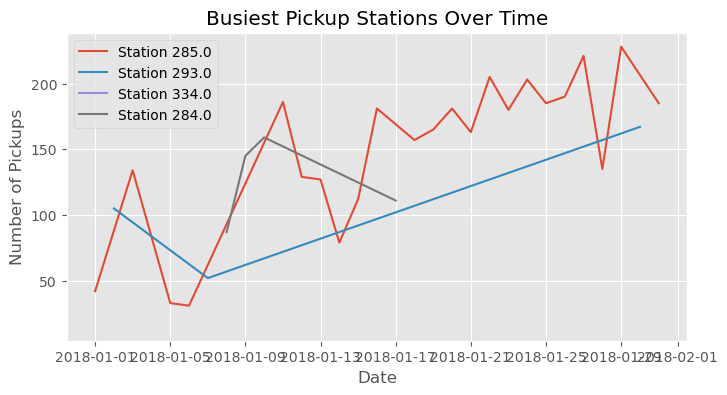

In [41]:
# Extract pickup stations
pickup_stations = df.groupby(['start_station_id', pd.Grouper(freq='D')]).size().reset_index(name='pickup_counts')

# Find the busiest pickup station for each day
busiest_pickup_stations = pickup_stations.loc[pickup_stations.groupby('starttime')['pickup_counts'].idxmax()]

# Plot the busiest pickup stations over time
plt.figure(figsize=(8, 4))
for station_id in busiest_pickup_stations['start_station_id'].unique():
    station_data = busiest_pickup_stations[busiest_pickup_stations['start_station_id'] == station_id]
    plt.plot(station_data['starttime'], station_data['pickup_counts'], label=f'Station {station_id}')

plt.title('Busiest Pickup Stations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.legend()
plt.show()

### Dropoffs

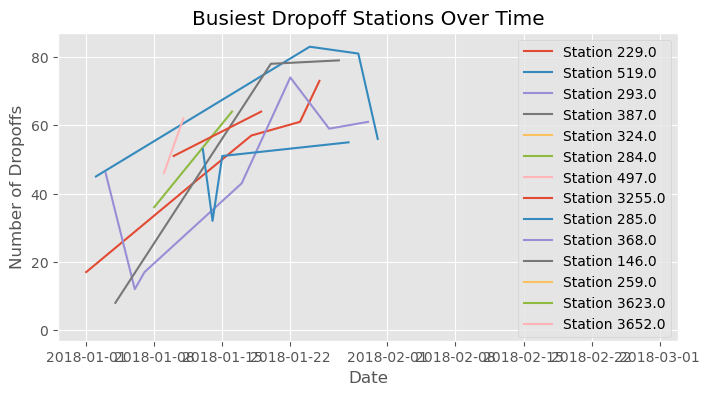

In [40]:
# Extract dropoff stations
dropoff_stations = df.groupby(['end_station_id', pd.Grouper(key='stoptime', freq='D')]).size().reset_index(name='dropoff_counts')

# Find the busiest dropoff station for each day
busiest_dropoff_stations = dropoff_stations.loc[dropoff_stations.groupby('stoptime')['dropoff_counts'].idxmax()]

# Plot the busiest dropoff stations over time
plt.figure(figsize=(8, 4))
for station_id in busiest_dropoff_stations['end_station_id'].unique():
    station_data = busiest_dropoff_stations[busiest_dropoff_stations['end_station_id'] == station_id]
    plt.plot(station_data['stoptime'], station_data['dropoff_counts'], label=f'Station {station_id}')

plt.title('Busiest Dropoff Stations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Dropoffs')
plt.legend()
plt.show()

Let's visualize the distribution of the start stations by doing a scatter plot of the latitude and longitude coordinates of the stations.

Text(0.5, 0, 'Longitude')

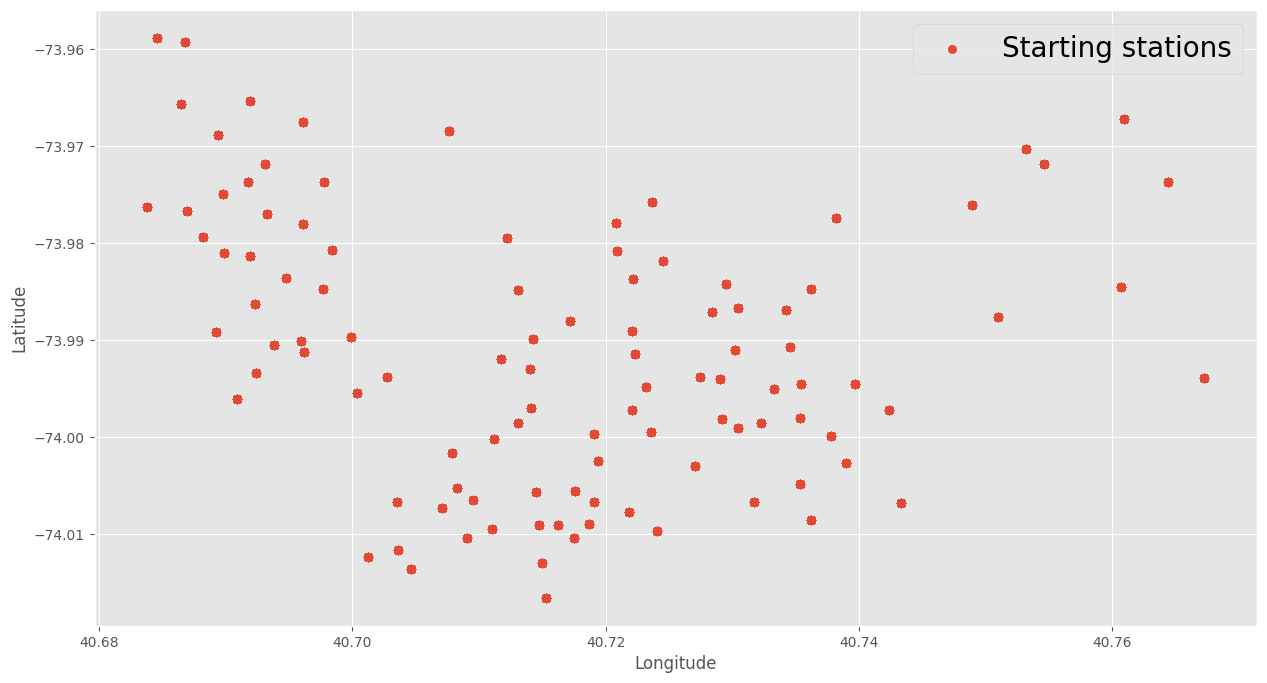

In [ ]:
plt.scatter(df.start_station_latitude, df.start_station_longitude, label = "Starting stations")
plt.legend(prop = {'size': 20})
plt.ylabel('Latitude')
plt.xlabel('Longitude')

Now let's do the same for the end stations as well.

Text(0.5, 0, 'Longitude')

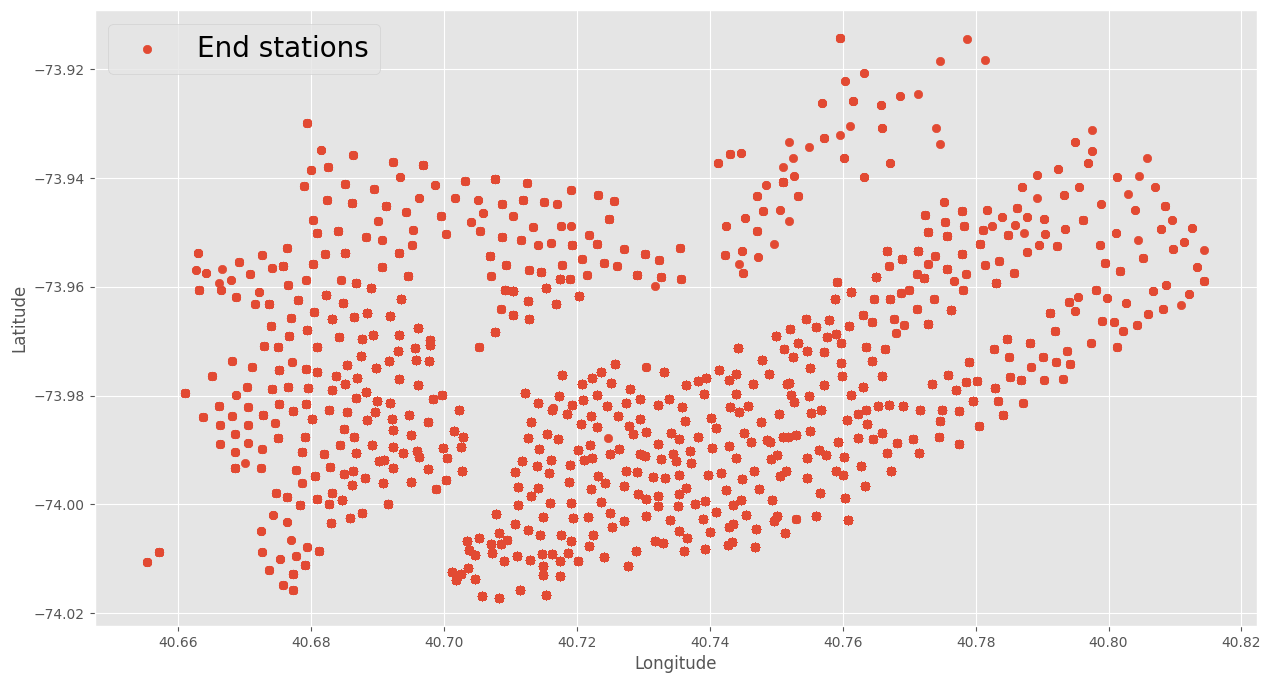

In [ ]:
plt.scatter(df.end_station_latitude, df.end_station_longitude, label = "End stations")
plt.legend(prop = {'size': 20})
plt.ylabel('Latitude')
plt.xlabel('Longitude')

From this we can tell that there are more end stations than starting stations. This would make sense since all the bikes start at certain stations where Citi bikes places the bikes at the start of the day, but then the bikes will spread out around the city as the day goes by and they are used.

# Data analysis 

## pickups and dropoffs pivot tables

In [64]:
df_copy = df.copy()

# Group by 15-minute intervals and count the number of trips in each interval
pickups = df_copy.groupby(pd.Grouper(freq='15T')).size().reset_index(name='pickups_num')
dropoffs = df_copy.groupby(pd.Grouper(key='stoptime', freq='15T')).size().reset_index(name='dropoffs_num')

In [65]:
# check if the number of pickpus and dropoffs matches the number of the rows
print(pickups['pickups_num'].sum() == len(df_copy))
print(dropoffs['dropoffs_num'].sum() == len(df_copy))

True
True


Now, we make a pivot table (gets the number of pickups/dropoffs per day as a dataframe). 
This helps us to better analyse the pickups/dropoffs per each quarter of a day.

In [66]:
# Create a pivot table for pickups
pickups['date'] = pickups['starttime'].dt.date
pickups['time'] = pickups['starttime'].dt.time
pickups_pivot = pickups.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')
# Print the result
pickups_pivot.head()



time,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,3,7,6,7,7,17,10,6,11,7,...,16,7,8,6,8,5,4,4,2,3
2018-01-02,4,7,3,2,2,0,0,1,1,0,...,20,15,19,22,21,9,10,9,6,9
2018-01-03,10,9,3,3,3,1,5,1,4,1,...,24,33,23,13,20,17,16,11,13,12
2018-01-04,11,12,9,6,0,6,2,1,3,1,...,4,4,0,2,1,2,1,2,3,1
2018-01-05,0,0,2,1,1,0,0,2,0,1,...,3,7,10,3,2,4,4,8,7,6


In [67]:
# Create a pivot table for dropoffs
dropoffs['date'] = dropoffs['stoptime'].dt.date
dropoffs['time'] = dropoffs['stoptime'].dt.time
dropoffs_pivot = dropoffs.pivot_table(index='date', columns='time', values='dropoffs_num', fill_value='NaN')
# Print the result
dropoffs_pivot.head()

time,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1.0,5.0,8.0,3.0,7.0,12.0,16.0,8.0,10.0,5.0,...,10.0,12.0,12.0,7.0,5.0,7.0,6.0,2.0,3.0,3.0
2018-01-02,3.0,7.0,4.0,3.0,1.0,2.0,0.0,1.0,1.0,0.0,...,22.0,16.0,17.0,24.0,19.0,13.0,9.0,13.0,5.0,9.0
2018-01-03,10.0,6.0,8.0,5.0,1.0,3.0,3.0,3.0,2.0,3.0,...,32.0,29.0,31.0,20.0,15.0,19.0,18.0,11.0,14.0,12.0
2018-01-04,8.0,17.0,6.0,9.0,3.0,2.0,4.0,2.0,4.0,1.0,...,3.0,7.0,0.0,0.0,3.0,2.0,0.0,1.0,4.0,2.0
2018-01-05,0.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0,...,6.0,6.0,7.0,5.0,4.0,1.0,7.0,3.0,6.0,8.0


C:\Users\ila\AppData\Local\Temp\ipykernel_18136\3000158556.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  daily_dropoffs = dropoffs_pivot.sum(axis=1)


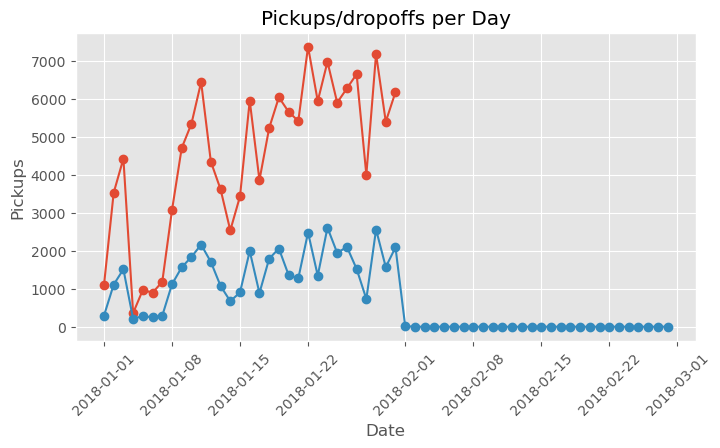

In [68]:
"""  pickups and dropoffs per day """

# re-run on the whole dataset
daily_pickups = pickups_pivot.sum(axis=1)
daily_dropoffs = dropoffs_pivot.sum(axis=1)

# Plot the line chart
plt.figure(figsize=(8, 4))
plt.plot(daily_pickups.index, daily_pickups.values, marker='o', linestyle='-')
plt.plot(daily_dropoffs.index, daily_dropoffs.values, marker='o', linestyle='-')
plt.title('Pickups/dropoffs per Day')
plt.xlabel('Date')
plt.ylabel('Pickups')
plt.xticks(rotation=45)
plt.show()

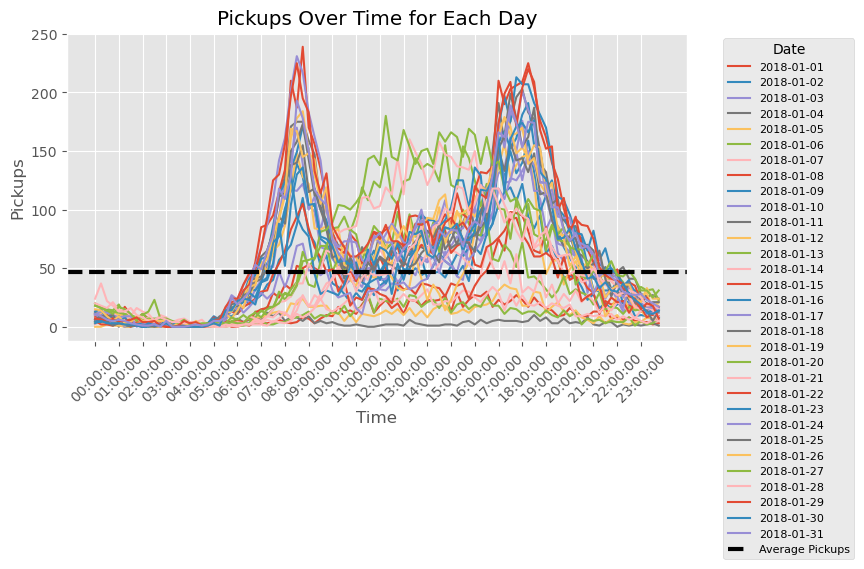

In [71]:
# Transpose the pivot_table to have time as rows and dates as columns
pickups_pivot_T = pickups_pivot.T

# Convert date columns to strings
pickups_pivot_T.index = pickups_pivot_T.index.astype(str)

# Plot each day as a separate line
plt.figure(figsize=(8, 4))
for date in pickups_pivot_T.columns:
    plt.plot(pickups_pivot_T.index, 
             pickups_pivot_T[date], 
             label=str(date))
    
# Generate the average pickups at each time
average_pickups = pickups_pivot_T.mean(axis=1)
plt.axhline(y=average_pickups.mean(), color='k', linewidth=3, linestyle='--', label='Average Pickups')


# Customize the plot
plt.title('Pickups Over Time for Each Day')
plt.xlabel('Time')
plt.ylabel('Pickups')
plt.xticks(rotation=45)

# Adjust legend position and size
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 8})

# Set the x-axis tick positions (showing every 4th label for example)
tick_positions = np.arange(0, len(pickups_pivot_T.index), 4)
plt.xticks(tick_positions, pickups_pivot_T.index[tick_positions], rotation=45)

plt.show()

In [74]:
pickups_pivot.head()

time,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,3,7,6,7,7,17,10,6,11,7,...,16,7,8,6,8,5,4,4,2,3
2018-01-02,4,7,3,2,2,0,0,1,1,0,...,20,15,19,22,21,9,10,9,6,9
2018-01-03,10,9,3,3,3,1,5,1,4,1,...,24,33,23,13,20,17,16,11,13,12
2018-01-04,11,12,9,6,0,6,2,1,3,1,...,4,4,0,2,1,2,1,2,3,1
2018-01-05,0,0,2,1,1,0,0,2,0,1,...,3,7,10,3,2,4,4,8,7,6


(Analysis goes here) 

## K-Means Clustering 

In [58]:
from sklearn.cluster import KMeans

K = 20
kmean = KMeans(K)

### Train

In [59]:
kmean.fit(pickups_pivot)

C:\Users\ila\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['time']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=20)

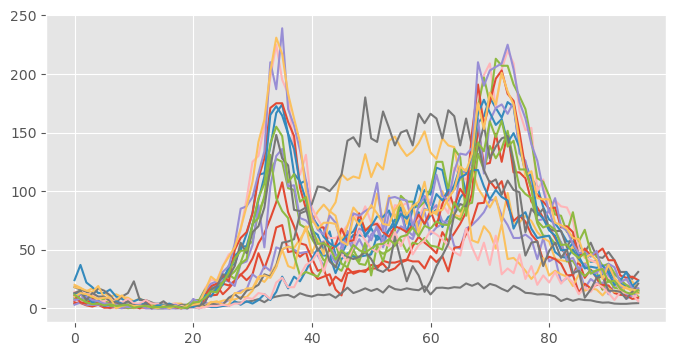

In [60]:
#the object cluster_centers_ is the list of cluster centroids obtained
x = range(96)
for c in kmean.cluster_centers_:
    plt.plot(x, c)

### Predict

In [98]:
pickup_clusters = pickups_pivot.copy()
pickup_clusters['cluster'] = kmean.fit_predict(pickups_pivot)
pickup_clusters

C:\Users\ila\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['time']. An error will be raised in 1.2.
  warnings.warn(


time,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00,cluster
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,3,7,6,7,7,17,10,6,11,7,...,7,8,6,8,5,4,4,2,3,3
2018-01-02,4,7,3,2,2,0,0,1,1,0,...,15,19,22,21,9,10,9,6,9,16
2018-01-03,10,9,3,3,3,1,5,1,4,1,...,33,23,13,20,17,16,11,13,12,15
2018-01-04,11,12,9,6,0,6,2,1,3,1,...,4,0,2,1,2,1,2,3,1,3
2018-01-05,0,0,2,1,1,0,0,2,0,1,...,7,10,3,2,4,4,8,7,6,3
2018-01-06,4,4,4,4,3,2,1,5,0,4,...,5,4,4,8,1,5,2,3,7,3
2018-01-07,2,5,4,4,3,1,4,1,2,1,...,11,6,9,6,8,5,3,6,5,3
2018-01-08,5,2,2,1,4,1,1,1,0,2,...,19,21,18,18,17,13,13,10,9,16
2018-01-09,6,6,7,4,5,2,3,1,0,0,...,31,39,19,29,18,17,12,14,8,15


In [104]:
pickup_clusters

time,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00,cluster
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,3,7,6,7,7,17,10,6,11,7,...,7,8,6,8,5,4,4,2,3,3
2018-01-02,4,7,3,2,2,0,0,1,1,0,...,15,19,22,21,9,10,9,6,9,16
2018-01-03,10,9,3,3,3,1,5,1,4,1,...,33,23,13,20,17,16,11,13,12,15
2018-01-04,11,12,9,6,0,6,2,1,3,1,...,4,0,2,1,2,1,2,3,1,3
2018-01-05,0,0,2,1,1,0,0,2,0,1,...,7,10,3,2,4,4,8,7,6,3
2018-01-06,4,4,4,4,3,2,1,5,0,4,...,5,4,4,8,1,5,2,3,7,3
2018-01-07,2,5,4,4,3,1,4,1,2,1,...,11,6,9,6,8,5,3,6,5,3
2018-01-08,5,2,2,1,4,1,1,1,0,2,...,19,21,18,18,17,13,13,10,9,16
2018-01-09,6,6,7,4,5,2,3,1,0,0,...,31,39,19,29,18,17,12,14,8,15


In [106]:
pickup_clusters.columns

Index([ 00:00:00,  00:15:00,  00:30:00,  00:45:00,  01:00:00,  01:15:00,
        01:30:00,  01:45:00,  02:00:00,  02:15:00,  02:30:00,  02:45:00,
        03:00:00,  03:15:00,  03:30:00,  03:45:00,  04:00:00,  04:15:00,
        04:30:00,  04:45:00,  05:00:00,  05:15:00,  05:30:00,  05:45:00,
        06:00:00,  06:15:00,  06:30:00,  06:45:00,  07:00:00,  07:15:00,
        07:30:00,  07:45:00,  08:00:00,  08:15:00,  08:30:00,  08:45:00,
        09:00:00,  09:15:00,  09:30:00,  09:45:00,  10:00:00,  10:15:00,
        10:30:00,  10:45:00,  11:00:00,  11:15:00,  11:30:00,  11:45:00,
        12:00:00,  12:15:00,  12:30:00,  12:45:00,  13:00:00,  13:15:00,
        13:30:00,  13:45:00,  14:00:00,  14:15:00,  14:30:00,  14:45:00,
        15:00:00,  15:15:00,  15:30:00,  15:45:00,  16:00:00,  16:15:00,
        16:30:00,  16:45:00,  17:00:00,  17:15:00,  17:30:00,  17:45:00,
        18:00:00,  18:15:00,  18:30:00,  18:45:00,  19:00:00,  19:15:00,
        19:30:00,  19:45:00,  20:00:00,  20:15:00, 

In [94]:
# rename the index name
pickup_clusters.index.names=['date'] 
# merge columns from the original dataframe
pickup_clusters_merged=pd.merge(df[['bikeid', 'usertype', 'birth_year', 'gender', 'date']], 
                                pickup_clusters[['date', 'cluster']], on='date', how='inner') 
# show the output
pickup_clusters_merged.head()

AttributeError: 'builtin_function_or_method' object has no attribute 'names'

# 3 Prediction challenge
## 3.1 Spatial clustering of stations

FROM PROJECT DESCRIPTION:
Cluster the stations spatially (nearby departing stations should be grouped together)
in no less than 20 clusters. Tasks 2 and 3 will be based on the results of this
clustering, and analysis should be performed on at least one cluster (e.g., the one
with the largest demand). More is preferable.


Let's start by dropping duplicate start stations and end stations and merge together all stations into one data frame. Then we will visualize the distribution, using the latitude and longitude coordinates of the stations.

In [15]:
# Assuming outlier_free_data contains station information and counts

# Extract counts for start and end stations
stations_start = outlier_free_data['start_station_id'].value_counts().reset_index()
stations_end = outlier_free_data['end_station_id'].value_counts().reset_index()

# Rename columns for clarity
stations_start.columns = ['station_id', 'count_start']
stations_end.columns = ['station_id', 'count_end']

# Extract latitude and longitude for start and end stations
coord_station_start = outlier_free_data[['start_station_id', 'start_station_latitude', 'start_station_longitude']].drop_duplicates('start_station_id')
coord_station_end = outlier_free_data[['end_station_id', 'end_station_latitude', 'end_station_longitude']].drop_duplicates('end_station_id')

# Rename columns for clarity
coord_station_start.columns = ['station_id', 'latitude_start', 'longitude_start']
coord_station_end.columns = ['station_id', 'latitude_end', 'longitude_end']

# Merge counts and coordinates for start and end stations
stations_start = stations_start.merge(coord_station_start, on='station_id', how='left')
stations_end = stations_end.merge(coord_station_end, on='station_id', how='left')

# Merge counts and coordinates for both start and end stations into a combined DataFrame
stations = stations_start.merge(stations_end, on='station_id', how='inner')

# Calculate total count for each station and drop unnecessary columns
stations['count'] = stations['count_start'] + stations['count_end']
stations.drop(['count_start', 'count_end', 'latitude_end', 'longitude_end'], axis=1, inplace=True)

# Rename columns for final output
stations.columns = ['station_id', 'latitude', 'longitude', 'count']


Text(0.5, 0, 'Latitude')

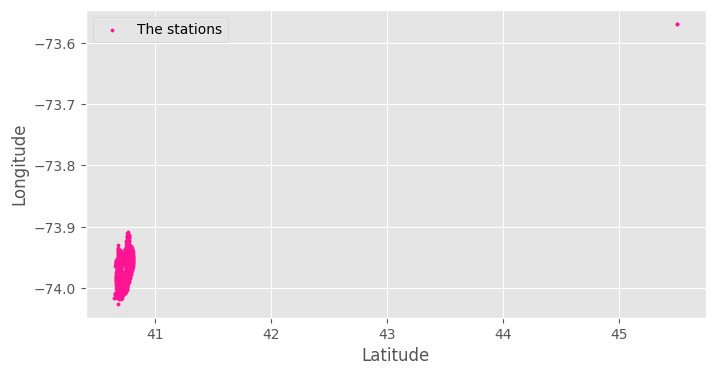

In [16]:
plt.scatter(stations.latitude, stations.longitude, label = "The stations", s=5, color='deeppink')
plt.legend(prop = {'size': 10})
plt.ylabel('Longitude')
plt.xlabel('Latitude')

On the scatter plot we can see that we have one outlier, thus an outlier both in longitude and latitude. Let's make a new scatter plot to better visualize the stations by excluding that outlier.

In [17]:
# Filter the DataFrame to exclude rows where latitude is higher than 41
stations = stations[stations['latitude'] <= 41]

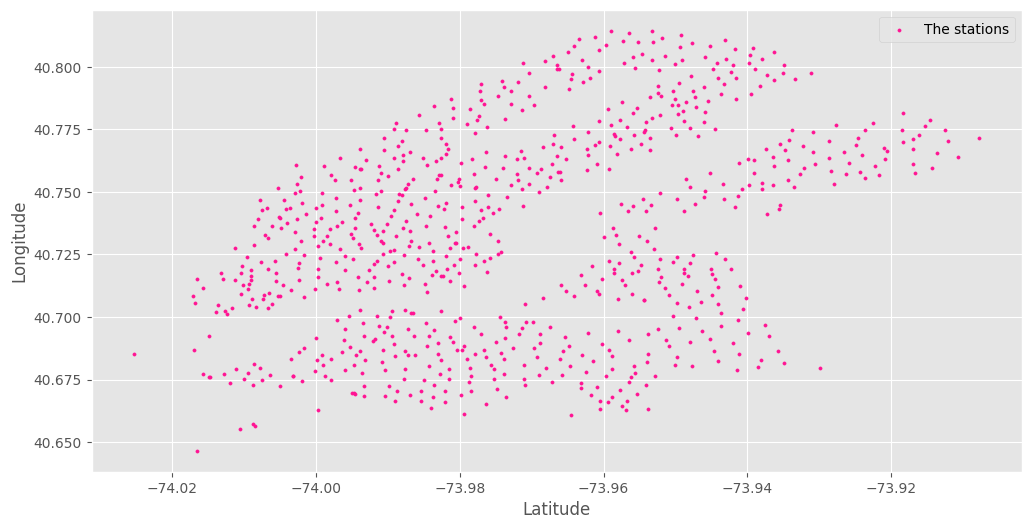

In [19]:
# Plot the scatter plot using filtered data
plt.figure(figsize=(12,6))
plt.scatter(stations.longitude, stations.latitude, label="The stations", s=5, color='deeppink')

# Add labels and legend
plt.legend(prop={'size': 10})
plt.ylabel('Longitude')
plt.xlabel('Latitude')

# Show the plot
plt.show()

Now let's do the clustering of the stations, using the stations Data Frame. Let's start with importing the package:

In [21]:
from sklearn.cluster import KMeans

In [142]:
km=KMeans(20, n_init='auto')
km.fit(stations[['latitude', 'longitude']])
stations['cluster'] = km.labels_
stations['cluster']

0       3
1      10
2       8
3      10
4      11
       ..
813     4
814     1
815     1
816    17
817     1
Name: cluster, Length: 816, dtype: int32

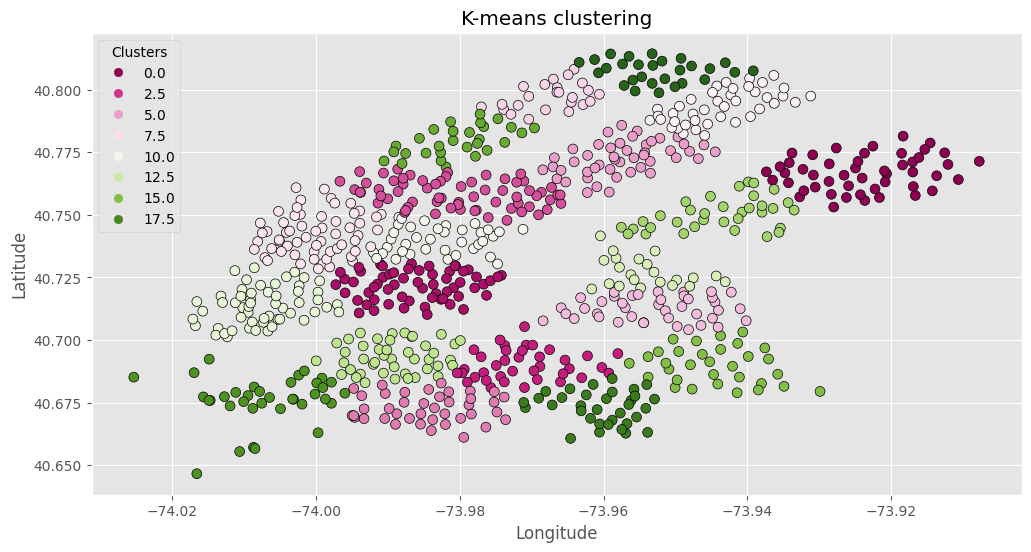

In [143]:
# Plot the clusters
plt.figure(figsize=(12, 6))
scatter = plt.scatter(stations.longitude, stations.latitude, c=stations.cluster, cmap='PiYG', edgecolors='k', s=50)

# Annotate cluster centers with cluster numbers
for i, center in enumerate(km.cluster_centers_):
    plt.annotate(f'Cluster {i}', center, textcoords="offset points", xytext=(-10, -5), ha='center', fontsize=8)

plt.title('K-means clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

Here we have a clustering of all the stations. There are 30 clusters. Now we will find and analyse the highest volume cluster:

In [169]:
cluster_counts = stations.groupby('cluster')['count'].sum().reset_index()
sorted_clusters = cluster_counts.sort_values('count', ascending=False)
highest_demand_cluster = sorted_clusters.iloc[0]['cluster']
print("The number of the Highest Demand Cluster: ",highest_demand_cluster)

df_high_demand_cluster = stations[stations['cluster'] == highest_demand_cluster]
print("Amount of stations in Highest Demand cluster: ",len(df_high_demand_cluster))

print("The count of the Highest Demand cluster: ", sum(df_high_demand_cluster["count"]))

outlier_free_data.head()

The number of the Highest Demand Cluster:  8
Amount of stations in Highest Demand cluster:  59
The count of the Highest Demand cluster:  5488465


,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date,start_cluster,end_cluster
starttime,,,,,,,,,,,,,,,
2018-01-01 13:50:57.434,16.166667,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,2018-01-01,3.0,10.0
2018-01-01 15:33:30.182,12.050000,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,2018-01-01,3.0,8.0
2018-01-01 15:39:18.337,8.266667,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,2018-01-01,3.0,8.0
2018-01-01 15:40:13.372,5.100000,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,2018-01-01,3.0,3.0
2018-01-01 18:14:51.568,5.100000,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,2018-01-01,3.0,16.0


Now let's plot the highest volume cluster:

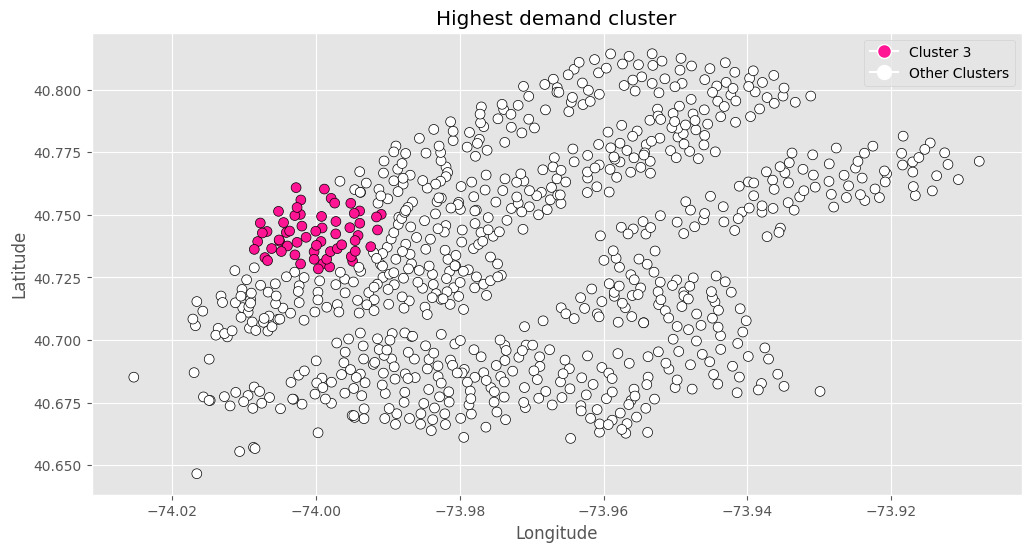

In [145]:
# Plot the clusters
plt.figure(figsize=(12, 6))

# Assign colors based on cluster
colors = np.where(stations['cluster'] == highest_demand_cluster, 'deeppink', 'white')

scatter = plt.scatter(stations.longitude, stations.latitude, c=colors, edgecolors='k', s=50)

# Annotate cluster centers with cluster numbers
for i, center in enumerate(km.cluster_centers_):
    plt.annotate(f'Cluster {i}', center, textcoords="offset points", xytext=(-10, -5), ha='center', fontsize=8)

plt.title('Highest demand cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a legend manually for custom colors
legend_labels = ['Cluster 3', 'Other Clusters']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='deeppink', markersize=10, label='Cluster 24'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Other Clusters')]

plt.legend(handles=legend_elements, labels=legend_labels)

plt.show()

Now we can see approximately in what area the Highest volume cluster is. When we compare this to a map of New York we can see that this is in a very popular area, so it would make sense that this is the Highest volume cluster. Now it would be curious to see the lowest volume cluster. 

In [168]:
cluster_counts = stations.groupby('cluster')['count'].sum().reset_index()
sorted_clusters = cluster_counts.sort_values('count', ascending=True)
lowest_demand_cluster = sorted_clusters.iloc[0]['cluster']
print("The number of the Lowest demand Cluster: ", lowest_demand_cluster)

df_low_demand_cluster = stations[stations['cluster'] == lowest_demand_cluster]
print("Amount of stations in Lowest demand cluster: ",len(df_low_demand_cluster))

print("The count of the Lowest demand cluster: ", sum(df_low_demand_cluster["count"]))

The number of the Lowest demand Cluster:  15
Amount of stations in Lowest demand cluster:  32
The count of the Lowest demand cluster:  398738


And let's plot the lowest demand cluster as well to see approximately where it lies in New York:

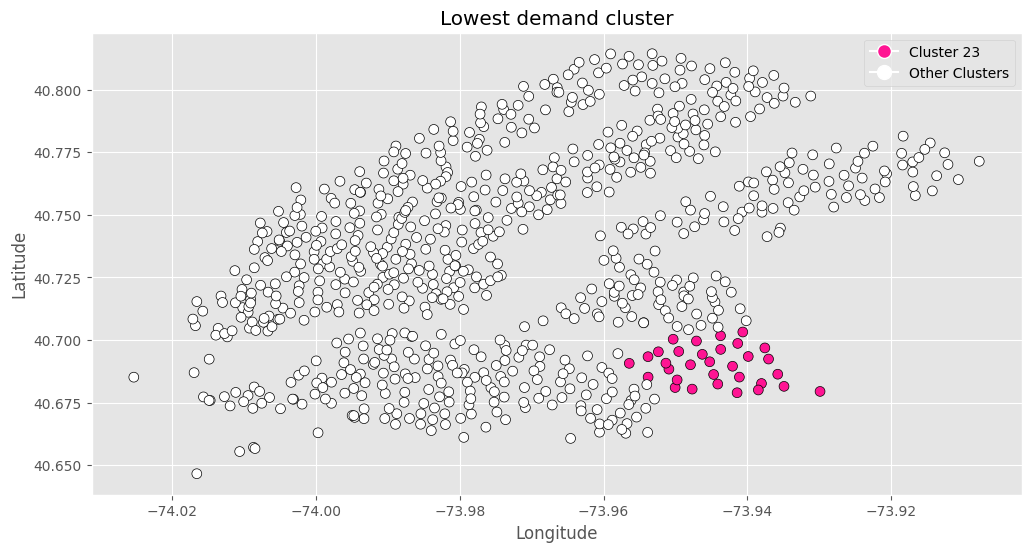

In [147]:
# Plot the clusters
plt.figure(figsize=(12, 6))

# Assign colors based on cluster
colors = np.where(stations['cluster'] == lowest_demand_cluster, 'deeppink', 'white')

scatter = plt.scatter(stations.longitude, stations.latitude, c=colors, edgecolors='k', s=50)

# Annotate cluster centers with cluster numbers
for i, center in enumerate(km.cluster_centers_):
    plt.annotate(f'Cluster {i}', center, textcoords="offset points", xytext=(-10, -5), ha='center', fontsize=8)

plt.title('Lowest demand cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a legend manually for custom colors
legend_labels = ['Cluster 23', 'Other Clusters']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='deeppink', markersize=10, label='Cluster 24'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Other Clusters')]

plt.legend(handles=legend_elements, labels=legend_labels)

plt.show()

We can see that the Lowest demand cluster is at the edge of the station map, which would make sense. If we compare this to a map of New York we can see that this is approximately in a suburban area in of New York.

Finally, let's add the start cluster and end cluster of each ride to our data frame.

In [148]:
# Create a dictionary to associate station IDs with their cluster values
dict = {}
for _, row in stations.iterrows():
    dict[row['station_id']] = row['cluster']


In [149]:
outlier_free_data['start_cluster'] = outlier_free_data['start_station_id'].map(dict)
outlier_free_data['end_cluster'] = outlier_free_data['end_station_id'].map(dict)
outlier_free_data.head()

,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date,start_cluster,end_cluster
starttime,,,,,,,,,,,,,,,
2018-01-01 13:50:57.434,16.166667,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,2018-01-01,3.0,10.0
2018-01-01 15:33:30.182,12.050000,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,2018-01-01,3.0,8.0
2018-01-01 15:39:18.337,8.266667,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,2018-01-01,3.0,8.0
2018-01-01 15:40:13.372,5.100000,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,2018-01-01,3.0,3.0
2018-01-01 18:14:51.568,5.100000,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,2018-01-01,3.0,16.0


## 3.2 Prediction model

We want to build a prediction model for the demand of a cluster of stations over the next 24 hours, considering both arrivals (bicycle dropoffs) and departures (pickups). 

We will start by making a lagging model to use as a baseline for our prediction model. This function creates lagged features and adds them to the data frame. The function is set to create these lagged features: 

- 1 hour back
- 24 hours back
- 7 days back

The function is based on a function from week 3.

In [ ]:
def buildLaggedFeatures(s, columns, lags=(4, 24*4, 4*24*7), dropna=True):
    '''
    Builds a new DataFrame to facilitate regressing over specific lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict = {}
        for c in s.columns:
            new_dict[c] = s[c]
        for col_name in columns:
            new_dict[col_name] = s[col_name]
            # create lagged Series at specified intervals
            for l in lags:
                new_dict['%s_lag%d' % (col_name, l/4)] = s[col_name].shift(l)
        res = pd.DataFrame(new_dict, index=s.index)

    elif type(s) is pd.Series:
        the_range = list(lags)
        res = pd.concat([s.shift(i) for i in the_range], axis=1)
        res.columns = ['lag_%d' % i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None

    if dropna:
        return res.dropna()
    else:
        return res

This is a function that computes the Mean squared error, the Root of the mean squared error and the R-squared error. The function is from week 4.

In [181]:
def compute_error(y_true, y_pred, nvariables = 2):
    mae = np.mean(np.abs(y_pred - y_true))
    rmse = np.sqrt(np.mean((y_pred - y_true)**2))
    r_squared = max(0, 1 - np.sum((y_true-y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    print("")
    print("- Mean Absolute Error = ", mae)
    print("- R-squared = ", r_squared)
    print("- Root Mean Squared Error = ", rmse)
    print("_____________________________________________________")
    return r_squared

# Explain what the function does:

Now we have created our lagged features data frame. Let's move on to the prediction model now. We will start by splitting our data up into training and test sets. Our training set will be the period from january to october and our test set will be the period from november to december.  

In [185]:
##Gera Regression model fyrir hvern cluster
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

def regressionModelGenerator(df,cluster):
    # Filter data_copy to select rows where 'start_cluster' equals the specified 'cluster'
    filtered_data_forPickups = df[df['start_cluster'] == cluster]
    filtered_data_forDropoffs = df[df['end_cluster'] == cluster]

    # Perform groupby at a frequency of 15 minutes and count occurrences for the filtered data
    pickups = filtered_data_forPickups.groupby(pd.Grouper(freq='15T')).size().reset_index(name='pickups_num')
    dropoffs = filtered_data_forDropoffs.groupby(pd.Grouper(key='stoptime', freq='15T')).size().reset_index(name='dropoffs_num')

    pickups_and_dropoffs = pickups.merge(dropoffs.dropoffs_num, left_index=True, right_index=True, how='outer')
    pickups_and_dropoffs = pickups_and_dropoffs[:35040]
    pickups_and_dropoffs.rename(columns={'starttime': 'datetime'}, inplace=True)
    pickups_and_dropoffs.set_index('datetime', inplace=True)

    pickups_and_dropoffs_Lag = buildLaggedFeatures(pickups_and_dropoffs, ['pickups_num', 'dropoffs_num'])

    features_to_use_pickups = ["pickups_num_lag1", "pickups_num_lag24", "pickups_num_lag168"]
    features_to_use_dropoffs = ["dropoffs_num_lag1", "dropoffs_num_lag24", "dropoffs_num_lag168"]

    #cutoff between training and test sets: 
    trainset_end = pd.to_datetime('2018-10-31 23:45:00')
    testset_start = pd.to_datetime('2015-11-01 00:00:00')

    # train/test split
    train_data = pickups_and_dropoffs_Lag.loc[pickups_and_dropoffs_Lag.index <= trainset_end]   
    test_data = pickups_and_dropoffs_Lag.loc[pickups_and_dropoffs_Lag.index >= testset_start]

    X_p_train = train_data.loc[train_data.index.month <= 10, features_to_use_pickups]
    X_d_train = train_data.loc[train_data.index.month <= 10, features_to_use_dropoffs]
    y_p_train = train_data.loc[train_data.index.month <= 10, 'pickups_num']
    y_d_train = train_data.loc[train_data.index.month <= 10, 'dropoffs_num']

    X_p_test = test_data.loc[(test_data.index.month >= 11) & (test_data.index.month <= 12), features_to_use_pickups]
    X_d_test = test_data.loc[(test_data.index.month >= 11) & (test_data.index.month <= 12), features_to_use_dropoffs]
    y_p_test = test_data.loc[(test_data.index.month >= 11) & (test_data.index.month <= 12), 'pickups_num']
    y_d_test = test_data.loc[(test_data.index.month >= 11) & (test_data.index.month <= 12), 'dropoffs_num']

    model_pickups = LinearRegression()
    model_dropoffs = LinearRegression()

    model_pickups.fit(X_p_train, y_p_train)
    model_dropoffs.fit(X_d_train, y_d_train)

    # make predictions
    #pickups_pred_train = model_pickups.predict(X_p_train)
    pickups_pred_test = model_pickups.predict(X_p_test)

    #dropoffs_pred_train = model_dropoffs.predict(X_d_train)
    dropoffs_pred_test = model_dropoffs.predict(X_d_test)

    print("Number of cluster: ", cluster)
    print("")
    print("Evaluation of the model when predicting pickups:")
    rsq1 = compute_error(y_p_test, pickups_pred_test)
    
    print("")
    print("Evaluation of the model when predicting dropoffs:")
    rsq2 = compute_error(y_d_test, dropoffs_pred_test)

    return rsq1, rsq2, pickups_pred_test, dropoffs_pred_test, y_p_test, y_d_test 



Note: We tried standarizing the data and found that it did not improve the results.

In [138]:
regressionModelGenerator(outlier_free_data, 18)

Evaluation of the model when predicting pickups:

- Mean Absolute Error =  4.10023136020986
- R-squared =  0.6847975269111135
- Root Mean Squared Error =  6.123166422337156
_____________________________________________________

Evaluation of the model when predicting dropoffs:

- Mean Absolute Error =  3.892048805672226
- R-squared =  0.6987924871154554
- Root Mean Squared Error =  5.662124752905395


In [ ]:
Rsquared = {}
for i in range(0,20):
    rsq1 , rsq2, pickups_pred_test, dropoffs_pred_test, y_p_test, y_d_test = regressionModelGenerator(outlier_free_data, i)
    Rsquared[i] = rsq1 , rsq2   

In [190]:
Rsquared
#then we draw a graph with y as Rsquared an x as number of clusters 

{0: (0.5174346500180022, 0.5177442023705854),
 1: (0.7610299288345067, 0.7901625468369861),
 2: (0.6855481578506752, 0.6784433129619054),
 3: (0.7586691042368633, 0.7740714380319877),
 4: (0.6830264803470678, 0.679551076044749),
 5: (0.7387582341910495, 0.757962426633261),
 6: (0.7032005345059791, 0.6951676438761156),
 7: (0.6717155842697247, 0.6411253593952089),
 8: (0.7861276587099584, 0.7942126539010383),
 9: (0.6528250312593785, 0.6392551474574688),
 10: (0.774079308744824, 0.7695615938634307),
 11: (0.7587708781538831, 0.762473478064641),
 12: (0.6384466258598689, 0.6290757720974474),
 13: (0.7282194345292621, 0.7411073884217204),
 14: (0.5481421149648411, 0.5684816370153196),
 15: (0.5344075126847152, 0.4777182325238555),
 16: (0.7336897295706103, 0.7645055543724085),
 17: (0.5667797032645309, 0.5428617847515672),
 18: (0.6076122348627282, 0.5702769737113946),
 19: (0.6064755326422693, 0.6043055147416361)}

In [ ]:
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting scatter plots in each subplot
axs[0, 0].scatter(x1, y1, color='blue', label='Plot 1')
axs[0, 0].scatter(x2, y2, color='orange', label='Plot 2')
axs[0, 0].set_title('Subplot 1')

axs[0, 1].scatter(x1, y1, color='green', label='Plot 1')
axs[0, 1].scatter(x2, y2, color='red', label='Plot 2')
axs[0, 1].set_title('Subplot 2')

axs[1, 0].scatter(x1, y1, color='purple', label='Plot 1')
axs[1, 0].scatter(x2, y2, color='black', label='Plot 2')
axs[1, 0].set_title('Subplot 3')

axs[1, 1].scatter(x1, y1, color='magenta', label='Plot 1')
axs[1, 1].scatter(x2, y2, color='cyan', label='Plot 2')
axs[1, 1].set_title('Subplot 4')

# Adding legend and adjusting layout
for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()

In [184]:
Rsquared

{0: (0.5174346500180022, 0.5177442023705854),
 1: (0.7610299288345067, 0.7901625468369861),
 2: (0.6855481578506752, 0.6784433129619054),
 3: (0.7586691042368633, 0.7740714380319877),
 4: (0.6830264803470678, 0.679551076044749),
 5: (0.7387582341910495, 0.757962426633261),
 6: (0.7032005345059791, 0.6951676438761156),
 7: (0.6717155842697247, 0.6411253593952089),
 8: (0.7861276587099584, 0.7942126539010383),
 9: (0.6528250312593785, 0.6392551474574688),
 10: (0.774079308744824, 0.7695615938634307),
 11: (0.7587708781538831, 0.762473478064641),
 12: (0.6384466258598689, 0.6290757720974474),
 13: (0.7282194345292621, 0.7411073884217204),
 14: (0.5481421149648411, 0.5684816370153196),
 15: (0.5344075126847152, 0.4777182325238555),
 16: (0.7336897295706103, 0.7645055543724085),
 17: (0.5667797032645309, 0.5428617847515672),
 18: (0.6076122348627282, 0.5702769737113946),
 19: (0.6064755326422693, 0.6043055147416361)}

# 4 Exploratory Component

RESEARCH QUESTION:
- Are the trips shorter/fewer in the winter compared to summer? And when are there more guest users renting bikes?
- Are the trips different when there's a public holiday compared to when there isn't a holiday?

Extra points: 
- calculate bikes needed for christmas eve and new years eve, since rentals are high those days

# 5 Conclusions

### Individual contributions

| Section              | Lilja | Berghildur | Ila | Ioana |
|----------------------|--------|---------|-------|------|
| Introduction         |        |         |       |      |
| Data Analysis        | x      | x       | x     |      |
| Data cleaning        | x      | x       | x     |      |
| Prediction Challenge | x      | x       |      |      |
| Exploratory Challenge|        |         |       |      |
| Conclusion           |        |         |       |      |

# Appendix

In [170]:
# Used to count words in Markdown cells; run in separate notebook

import json

with open('main.ipynb', encoding='utf-8') as json_file:
    data = json.load(json_file)

found = False
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount)

1420
